<a href="https://colab.research.google.com/github/MohammedFawazAli/NLP/blob/main/NLP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the data

Import the `ufos.csv` file from the provided GitHub URL into a pandas DataFrame.


In [7]:
# Run once in Colab if some packages are missing
!pip install -q scikit-learn matplotlib seaborn

import os, pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/MohammedFawazAli/NLP/0c5ebd1ded6011d69393fd58d14fee7ada4149ca/ufos.csv')
df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611


Rows: 80332
Columns: ['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)', 'duration (hours/min)', 'comments', 'date posted', 'latitude', 'longitude']
shape
light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
unknown       5584
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
Name: count, dtype: int64


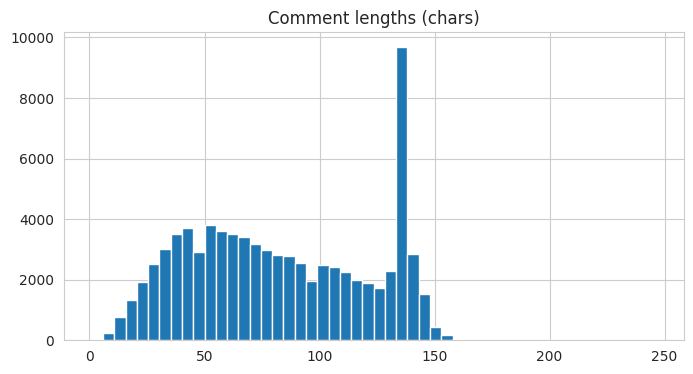

In [10]:
# Basic checks
print("Rows:", len(df))
print("Columns:", df.columns.tolist())
print(df['shape'].value_counts().head(20))

# length distribution of cleaned comments
df['len_chars'] = df['comments'].astype(str).str.len()
df['len_chars'].hist(bins=50, figsize=(8,4))
plt.title('Comment lengths (chars)')
plt.show()

In [13]:
# Drop rows with empty comments if you want, or keep them.
data = df.copy()
# Optionally drop rows with empty comments:
data = data[data['comments'].astype(str).str.strip() != '']

# Find shapes with only one occurrence
shape_counts = data['shape'].value_counts()
shapes_to_remove = shape_counts[shape_counts < 2].index

# Filter out rows with shapes that have only one occurrence
data = data[~data['shape'].isin(shapes_to_remove)]

X = data['comments'].astype(str).values
y = data['shape'].astype(str).values

# stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=42, stratify=y)
print("Train:", len(X_train), "Test:", len(X_test))

Train: 64261 Test: 16066


In [14]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), min_df=5, max_df=0.9)),
    ('lr', LogisticRegression(max_iter=200, class_weight='balanced', solver='saga', n_jobs=-1))
])

print("Training...")
pipeline.fit(X_train, y_train)
print("Done.")

Training...
Done.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.34165318062990163

Classification report (macro avg important):

              precision    recall  f1-score   support

    changing     0.2191    0.2219    0.2205       392
     chevron     0.2861    0.5000    0.3640       190
       cigar     0.3132    0.4672    0.3750       411
      circle     0.3939    0.3292    0.3586      1522
        cone     0.6957    0.2540    0.3721        63
    crescent     0.0000    0.0000    0.0000         0
       cross     0.6667    0.0426    0.0800        47
    cylinder     0.3423    0.3969    0.3676       257
       delta     0.0000    0.0000    0.0000         1
     diamond     0.2846    0.4534    0.3497       236
        disk     0.4464    0.5110    0.4765      1043
         egg     0.2113    0.3684    0.2686       152
    fireball     0.0000    0.0000    0.0000      1242
       flash     0.3713    0.3797    0.3755       266
   formation     0.2257    0.4297    0.2959       491
       light     0.6000    0.3658    0.4545      3313
    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

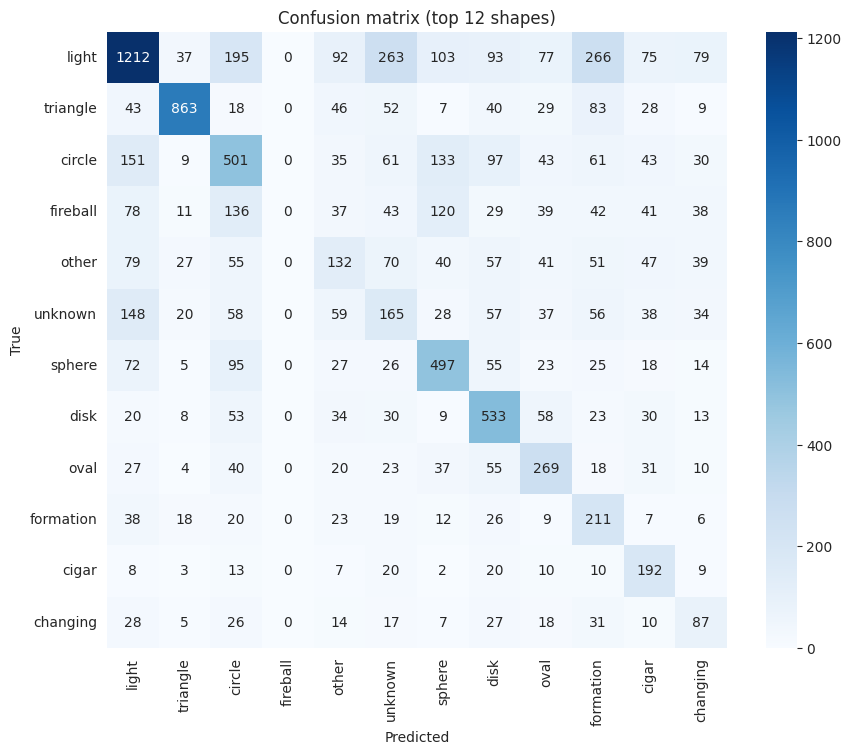

In [15]:
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report (macro avg important):\n")
print(classification_report(y_test, y_pred, digits=4))

# Confusion matrix for top classes (largest)
labels = list(data['shape'].value_counts().head(12).index)
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('True')
plt.title('Confusion matrix (top 12 shapes)')
plt.show()